In [2]:
import requests

In [3]:
url = 'https://www.pagina12.com.ar/'

In [4]:
p12 = requests.get(url)
p12.status_code

200

In [5]:
print(p12.text)

<!DOCTYPE html><html class="no-js " lang="es"><head><meta charset="utf-8"><title>Página | 12: La otra mirada sobre Argentina y el mundo</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><link rel="canonical" href="https://www.pagina12.com.ar"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><meta property="description" name="description" content="Información sobre Argentina y el mundo. Noticias en fotos y videos de los principales hechos y acontecimientos del país. Análisis, opinión y entrevistas."><meta property="fb:pages" n

Encabezados de la respuesta

In [6]:
p12.headers

{'Date': 'Thu, 27 Apr 2023 21:46:35 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'vary': 'Accept-Encoding', 'x-dns-prefetch-control': 'off', 'strict-transport-security': 'max-age=15724800; includeSubDomains', 'x-download-options': 'noopen', 'x-content-type-options': 'nosniff', 'x-xss-protection': '1; mode=block', 'x-etag': 'W/"7145d-BElTaMdu5Vi67lrF4uf6sORme/w"', 'x-backend': 'frontend', 'x-type': 'Dynamic URI', 'x-backend-ttl': '120.000', 'age': '50', 'grace': '86400.000 none', 'ttl': '69.552', 'x-instance': 'cache-front-prod-varnish-779f5667bd-szgzm', 'x-restarts': '0', 'x-cache': 'hit cached', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '7bea42511be7decf-GUA', 'Content-Encoding': 'gzip'}

encabezado de la solicitud

In [7]:
p12.request.headers

{'User-Agent': 'python-requests/2.28.2', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [8]:
p12.request.method

'GET'

In [9]:
p12.request.url

'https://www.pagina12.com.ar/'

In [10]:
from bs4 import BeautifulSoup

In [11]:
s = BeautifulSoup(p12.text,'html.parser')

In [12]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página | 12: La otra mirada sobre Argentina y el mundo
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <link href="https://www.pagina12.com.ar" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Información sobre Argentina y el mundo. Noticias en fotos y videos de los principales hechos y acontecimientos del país. Análisis, opinión y entrevistas." name="description" property="des

In [13]:
secciones = s.find('ul',attrs={'class':'main-sections'}).find_all('li')

In [14]:
seccion=secciones[0]

In [15]:
seccion.a.get('href')


'https://www.pagina12.com.ar/secciones/el-pais'

In [16]:
seccion.a.get_text()

'El país'

In [17]:
links_secciones = [seccion.a.get('href') for seccion in secciones]

In [18]:
sec =  requests.get(links_secciones[0])

In [19]:
s_seccion = BeautifulSoup(sec.text,'html.parser')

In [20]:
print(s_seccion)

<!DOCTYPE html>
<html amp="" lang="es"><head><meta charset="utf-8"/><title>El país | Página12</title><!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ --><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}</script><script type="application/ld+json">{"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": "False","image": {"@type": "ImageObject","url": "https://images.pagina12.com.ar/styles/focal_3_2_1200x800/public/2023-04/720588

In [21]:
featured_article=s_seccion.find('article', attrs={'class':'article-item--main'})
featured_article

<article class="article-item article-item--main deco-bar video"><!-- Image --><div class="article-item__header deco-bar-here"><a href="/544372-acto-y-discurso-de-cristina-kirchner-en-la-plata-hoy-el-vide"><!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ --><amp-img alt="" class="" height="240" layout="responsive" src="https://images.pagina12.com.ar/styles/focal_3_2_360x240/public/2023-04/720588-whatsapp-20image-202023-04-27-20at-205-30-37-20pm.jpeg?h=b3660f0d&amp;itok=Ky91BDlu" srcset="https://images.pagina12.com.ar/styles/focal_3_2_360x240/public/2023-04/720588-whatsapp-20image-202023-04-27-20at-205-30-37-20pm.jpeg?h=b3660f0d&amp;itok=Ky91BDlu 360w, https://images.pagina12.com.ar/styles/focal_3_2_300x200/public/2023-04/720588-whatsapp-20image-202023-04-27-20at-205-30-37-20pm.jpeg?h=b3660f0d&amp;itok=kUO5QGSz 300w, https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2023-04/720588-whatsapp-20image-202023-04-27-20at-205-30-37-20pm.

In [22]:
featured_article.a.get('href')

'/544372-acto-y-discurso-de-cristina-kirchner-en-la-plata-hoy-el-vide'

In [23]:
article_list = s_seccion.find_all('div',attrs={'class':'articles-list'})
article_list

[<div class="articles-list is-grid-col2 grid-mobile-row"><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/lists/articles_list_item.dust/ --><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/articles/featured_article.dust/ --><article class="article-item article-item--featured"><!-- Image --><div class="article-item__header deco-bar-here-bottom is-mobile-left"><a href="/544259-cristina-kirchner-en-la-plata-hoy-a-que-hora-habla-los-detal"><!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ --><amp-img alt="Cristina Kirchner habla en el Teatro Argentino de La Plata." class="" height="313" layout="responsive" src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2023-04/720391-g0017254.JPG?h=da93fd57&amp;itok=yeqSBD4f" srcset="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2023-04/720391-g0017254.JPG?h=da93fd57&amp;itok=yeqSBD4f 470w, https://images.pagina12.com.ar/styles/focal_3_2_300x200/public/2023-04/7

In [24]:
article_list[1]

<div class="articles-list"><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/lists/articles_list_item.dust/ --><!-- DUST PATH: /usr/src/app/src/templates/partials/amp/articles/article_teaser.dust/ --><article class="article-item article-item--teaser"><!-- Image --><div class="article-item__header"><a href="/544316-fernando-espinoza-representamos-a-la-argentina-de-la-producc"><!-- DUST PATH: /usr/src/app/node_modules/frontend-core/views/widgets/fc_displayImg_amp.dust/ --><amp-img alt="" class="" height="200" layout="responsive" src="https://images.pagina12.com.ar/styles/focal_3_2_300x200/public/2023-04/720500-captura.JPG?h=6f3507fc&amp;itok=p4ufyEnU" width="300"><noscript><img alt="" height="200" src="https://images.pagina12.com.ar/styles/focal_3_2_300x200/public/2023-04/720500-captura.JPG?h=6f3507fc&amp;itok=p4ufyEnU" width="300"/></noscript></amp-img></a></div><div class="article-item__content-footer-wrapper gutter-small deco-bar-here-left"><div class="article-item__content"><!-

In [25]:

temp=article_list[1].find_all('article',attrs={'class':'article-item'})

In [26]:
temp[0].find('a').get('href')
links = [ actual.find('a').get('href') for actual in temp]
links

['/544316-fernando-espinoza-representamos-a-la-argentina-de-la-producc',
 '/544290-diputados-trabaja-en-la-transparencia-de-sociedades-por-acci',
 '/544286-bordet-unifica-las-elecciones-nacionales-y-provinciales',
 '/544241-a-20-anos-de-la-eleccion-que-llevo-a-nestor-kirchner-a-la-ca',
 '/544240-nueva-ronda-de-testigos-sobre-la-obra-social-del-poder-judic',
 '/544229-procrear-ii-reabren-inscripciones-para-la-linea-desarrollos-',
 '/544196-a-que-hora-habla-cristina-hoy-en-la-plata',
 '/544349-historico-paso-en-san-juan-adjudico-el-proyecto-para-ilumina']

In [27]:
def notices(soup):
    article_list = soup.find_all('div',attrs={'class':'articles-list'})
    temp=article_list[1].find_all('article',attrs={'class':'article-item'})
    links = [ actual.find('a').get('href') for actual in temp]
    return links

In [30]:
lista_notas = notices(s_seccion)

Descargar Contenido

In [32]:
url_nota = lista_notas[0]
url_nota

'/544316-fernando-espinoza-representamos-a-la-argentina-de-la-producc'

In [35]:
try:
    url_completo= 'https://www.pagina12.com.ar'+url_nota
    nota= requests.get(url_completo)
    if nota.status_code==200:
        s_nota = BeautifulSoup(nota.text, 'html.parser')
        #extraccion del titulo
        titulo=s_nota.find('h1')
        print(titulo.text)
        #extraer  la fecha
        fecha=s_nota.find('time')
        print(fecha.text)
        #extraccion de la volanda
        volanda= s_nota.find('h2',attrs={'class':'h4'})
        print(volanda.text)
        
except Exception as e:
    print('Error:')
    print(e)
    print('\n')

Fernando Espinoza: “Representamos a la Argentina de la producción y el trabajo, no a la de la especulación financiera” 
27 de abril de 2023 - 14:37
Federación Argentina de Municipios


In [36]:
#Imagen
media = s_nota.find('div',attrs={'class':'image-wrapper'})

In [41]:
#podria descargar varias imganes en caso de que se adapten a la pantalla del navegador
imagenes= media.find_all('img')
if len(imagenes)==0:
    print('No hay imagenes')
else: 
    imagen = imagenes[-1]
    img_src =imagen.get('src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2023-04/720500-captura.JPG?h=6f3507fc&itok=65NzeBxE


In [42]:
img_req = requests.get(img_src)
img_req.status_code

200

In [43]:
from IPython.display import Image

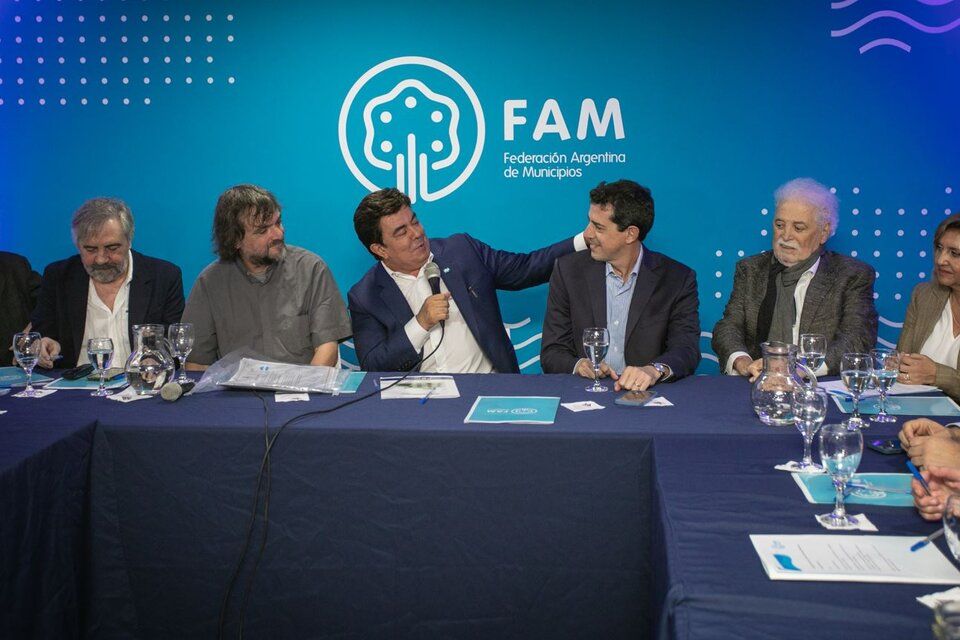

In [44]:
Image(img_req.content)